In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

In [2]:
#Make dataset
# ground truth label 0 or 1
# predict probs: (0,1)
# logistic loss
def gen_sample_data():
    sampleNo = 1000
    mu = np.array([[1,5]])
    sigma = np.array([[2,0],[0,3]])
    R = cholesky(sigma)
    s = np.dot(np.random.randn(sampleNo,2),R)+mu
    x1 = np.hstack((s,np.ones((sampleNo,1))))
    plt.plot(s[:,0],s[:,1],"+")

    mu = np.array([[6,0]])
    sigma = np.array([[2,1],[3,6]])
    R = cholesky(sigma)
    s = np.dot(np.random.randn(sampleNo,2),R)+mu
    x2 = np.hstack((s,np.zeros((sampleNo,1))))
    plt.plot(s[:,0],s[:,1],"*")
    plt.show()
    X = np.vstack((x1,x2))
    return X

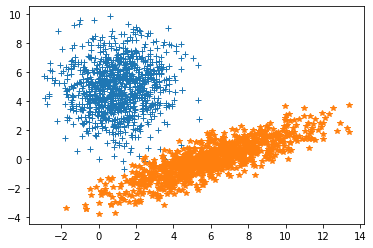

array([[ 2.10909978,  2.9606646 ,  1.        ],
       [-1.30085929,  6.44899071,  1.        ],
       [ 3.03821351,  5.55406716,  1.        ],
       ...,
       [10.69840002,  2.76401791,  0.        ],
       [ 7.02453899,  1.00906315,  0.        ],
       [ 4.52772964,  0.26057916,  0.        ]])

In [3]:
gen_sample_data()

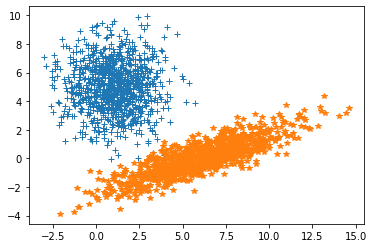

(2000, 3)

In [4]:
gen_sample_data().shape

In [6]:
def sigmoid(w1,w2,b,x):
    pred_y = 1 / ( 1+ np.exp(- (w1 * x[:,0] + w2 * x[:,1] + b)))

    return pred_y

In [7]:
#loss function
def eval_loss(w1,w2,b,x,y):
    loss = -(y * np.log(sigmoid(w1,w2,b,x)) + (1 - y) * np.log(1-sigmoid(w1,w2,b,x)))

    return np.mean(loss)

In [8]:
#gradient
def gradient(pred_y,y,x):
    diff = pred_y - y
    dw1 = diff * x[:,0]
    dw2 = diff * x[:,1]
    db = diff
    return dw1,dw2,db

In [15]:
#update w b
def cal_step_gradient(bactch_x,batch_y,w1,w2,b,lr):
    pred_y = sigmoid(w1,w2,b,bactch_x)
    dw1,dw2,db = gradient(pred_y , batch_y,bactch_x)
    w1 = w1 - lr * np.mean(dw1)
    w2 = w2 - lr * np.mean(dw2)
    b = b - lr * np.mean(db)

    return w2,w1,b

In [30]:
def train(x,batch_size,lr,max_iter):
    w1 = 0
    w2 = 0
    b = 0
    x_axe = np.linspace(np.min(x[:,0]),np.max(x[:,0]),1000)
    #y_axe = np.linspace(np.min(x[:,1]),np.max(x[:,1]),1000)
    plt.ion()
    fig,ax = plt.subplots()
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x), batch_size,False)
        batch_x = np.array([x[j][:2] for j in batch_idxs])
        batch_y = np.array([x[j][2] for j in batch_idxs])
        w1 ,w2 , b = cal_step_gradient(batch_x,batch_y,w1,w2,b,lr)
        print(f"w1:{w1},w2:{w2},b:{b}")
        print(f"loss:{eval_loss(w1,w2,b,batch_x,batch_y)}")

        plt.xlim(np.min(x[:,0]*1.1),np.max(x[:,0]*1.1))
        plt.ylim(np.min(x[:,1]*1.1),np.max(x[:,1]*1.1))
        plt.scatter(x[:,0],x[:,1],c = x[:,2])
        #y_axe * w2 + x_axe *w1 +b
        #construct line with predict param w1
        y_axe = -(b + x_axe *w1 +b)/w2
        plt.plot(x_axe,y_axe, linewidth = 2)
        plt.title(f"LOGISTIC Regression Iter:{i+1}")
        plt.pause(0.5)
        if i != max_iter-1:
            ax.cla()
    plt.ioff()
    plt.show()
    return w1,w2,b

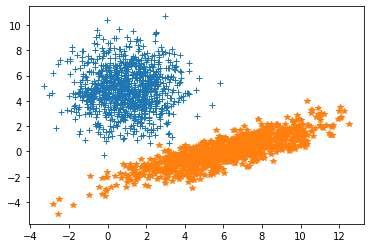

w1:0.06641804544104472,w2:-0.05022458057510812,b:0.0005
loss:0.8388826942578084


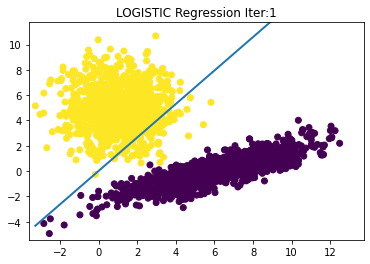

w1:-0.0006544081571756011,w2:-0.035946878995986795,b:-0.0028394786180008643
loss:0.727088984945169


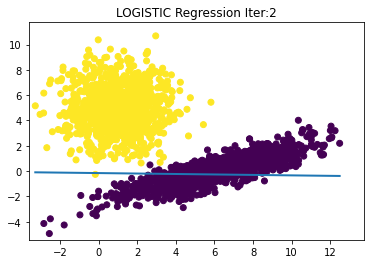

w1:0.026917697705095014,w2:-0.07173268949292948,b:-0.002137213372987979
loss:0.8229918489180459


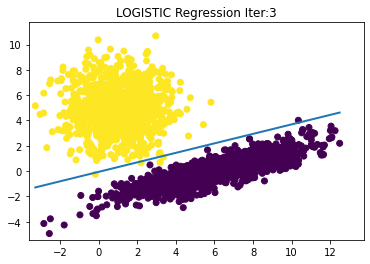

w1:0.008371277649732653,w2:-0.04061777248618546,b:-0.0015469055162223608
loss:0.7614149320188094


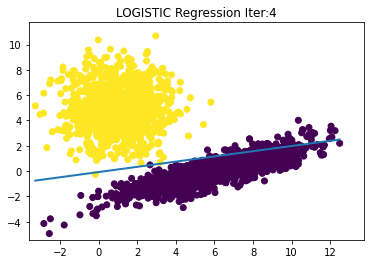

w1:0.02517237727859656,w2:-0.05614641998128045,b:-0.0006662690102240646
loss:0.7977729832518604


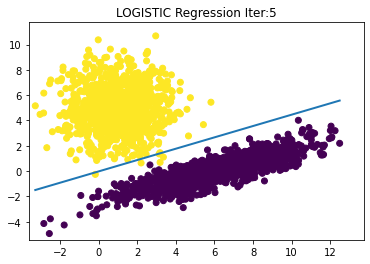

w1:0.010593446946685722,w2:-0.05730601508329805,b:-0.001649219286730967
loss:0.7814456946631181


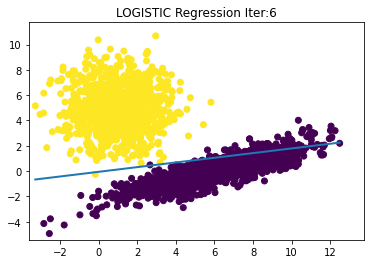

w1:0.007176729813299018,w2:-0.06182626282470799,b:-0.003002059549016261
loss:0.7780760128622368


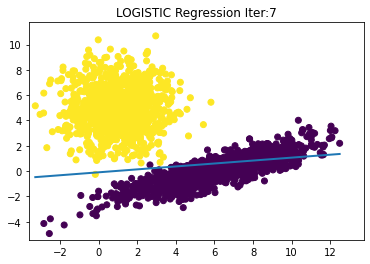

w1:0.007785312183482149,w2:-0.056596404559876246,b:-0.0014554308966894392
loss:0.7757360006166703


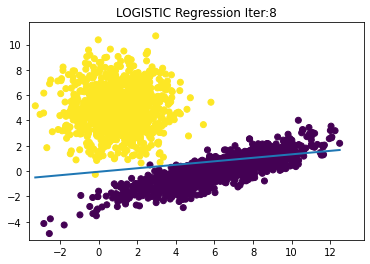

w1:0.02122904944525006,w2:-0.03414596315159457,b:0.0019199119285176886
loss:0.7602518075058023


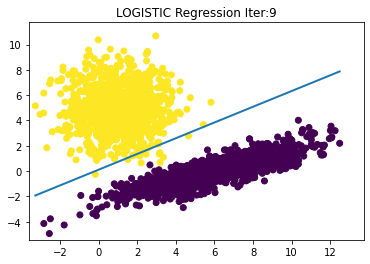

w1:0.046965500331874174,w2:-0.02823206582999195,b:0.0047462555721453125
loss:0.7840582238432922


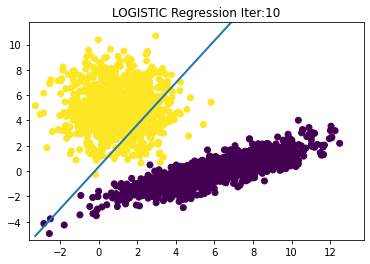

(0.046965500331874174, -0.02823206582999195, 0.0047462555721453125)

In [31]:
X = gen_sample_data()
train(X,100,0.05,10)